# Read input file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
file_name = 'BTO_fc_bec.txt'
structure = []
ion_names = []
ion_positions = []
born_charge_tensor = []
force_constants_tensor = []
mode = 'structure'
with open(file_name) as f:
    for line in f:
        
        if mode == 'structure':
            if '[' in line:
                sl = line.split()
                fl = [float(sl[2].strip(',')),float(sl[3].strip(',')),float(sl[4].strip())]
                structure.append(np.array(fl))
            if 'symbol' in line:
                mode = 'ions'
                
        if mode == 'ions':
            if 'symbol' in line:
                ion_names.append(line.split()[2])
            elif 'coordinates' in line:
                sl = line.split()
                fl = [float(sl[2].strip(',')),float(sl[3].strip(',')),float(sl[4].strip())]
                ion_positions.append(np.array(fl))
            elif 'BORN' in line:
                mode = 'born_charge_tensor'
        if mode == 'born_charge_tensor':
            if '[[' in line:
                born_charge_tensor.append([])
            if '[' in line:
                line = line.replace('[',' ').replace(']',' ')
                sl = line.split()
                fl = [float(sl[0]),float(sl[1]),float(sl[2])]
                born_charge_tensor[-1].append(np.array(fl))
            if 'FORCE' in line:
                mode = 'force_constants_tensor'
                force_constants_tensor = np.zeros((len(ion_names),len(ion_names),3,3))
                
        if mode == 'force_constants_tensor':
            if '#' in line:
                i = int(line.split()[2].strip('(,'))-1
                j = int(line.split()[3].strip(')'))-1
                k = 0
            elif '[' in line:
                sl = line.split()
                fl = [float(sl[2].strip(',')),float(sl[3].strip(',')),float(sl[4].strip())]
                force_constants_tensor[i,j,k,:] = np.array(fl)
                k += 1
            
            
structure = np.array(structure)
ion_positions = np.array(ion_positions)
born_charge_tensor = np.array(born_charge_tensor)
structure = np.array(structure)
print('structure',structure.shape)
print('ion_positions',ion_positions.shape)
print('born_charge_tensor',born_charge_tensor.shape)
print('structure',structure.shape)
print('force_constants_tensor',force_constants_tensor.shape)


structure (3, 3)
ion_positions (5, 3)
born_charge_tensor (5, 3, 3)
structure (3, 3)
force_constants_tensor (5, 5, 3, 3)


In [4]:
atoms = ['Ba','Ti','O','O','O']
s = ''
for i, at in enumerate(born_charge_tensor):
    s += atoms[i]+': '
    for j, row in enumerate(at):
        s += f'{at[j,j]:.2f}, '
    s+='\n'

print(s)

Ba: 2.77, 2.77, 2.81, 
Ti: 7.10, 7.10, 6.35, 
O: -5.61, -2.16, -2.05, 
O: -2.16, -5.61, -2.05, 
O: -2.09, -2.09, -5.07, 



In [2]:
if 1:
    # updated DFT force constants
    import h5py
    import numpy as np


    filename = "EField2/force_constants.hdf5"
    with h5py.File(filename, "r") as f:
        # List all groups
        dic = {}
        for key in f.keys():
            dic[key] = np.array(f[key])
            print(key, f[key])
    force_constants_tensor = dic['force_constants']
    Z_ij_GGA = np.array([[[2.7659162129062875, -2.3966395519147712e-08, -8.165271427141e-08], [-2.3966395519147712e-08, 2.765916212906732, 8.067197969120583e-08], [-2.2188200665462415e-05, 2.2188199767264954e-05, 2.7876353636680893]], [[7.146442315796008, 1.3999908296336523e-07, 1.5526162587479634e-06], [1.3999908296336523e-07, 7.146442315796008, -1.5539603766170687e-06], [-3.410622022539742e-05, 3.410621573441011e-05, 6.636287902566891]], [[-5.6460177808744385, 3.6112239546879865e-06, -2.5126086361639914e-06], [2.8132591598061954e-06, -2.1444351632907392, 7.090991224756102e-07], [-3.7142629741987735e-05, 6.410229604667673e-06, -2.08085051656158]], [[-2.1444351632907392, 2.813258715028608e-06, -7.090991224756102e-07], [3.6112239546879865e-06, -5.646017780871326, 2.512609080941579e-06], [-6.410229604667673e-06, 3.714270608877207e-05, -2.080850521684002]], [[-2.1237609578906826, 2.5827442795874166e-06, -3.3113362246081642e-06], [2.582743390032242e-06, -2.1237609578911276, 3.3116235509296206e-06], [-2.6137185091623117e-05, 2.613718778621551e-05, -5.26285279285597]]])
    Z_ij_LDA = np.array([[[ 2.76553092e+00,  0.00000000e+00,  4.89255346e-12], [ 0.00000000e+00,  2.76553092e+00,  0.00000000e+00], [-2.38022328e-11 ,-1.97603442e-11 , 2.81339221e+00]], [[ 7.09503972e+00,  0.00000000e+00,  9.78510692e-12],  [ 0.00000000e+00,  7.09503972e+00,  0.00000000e+00],  [ 1.12274683e-11, -1.79639493e-12,  6.34836663e+00]], [[-5.61163701e+00,  0.00000000e+00,  0.00000000e+00],  [ 0.00000000e+00, -2.15680172e+00,  0.00000000e+00],  [-1.67962926e-10,  1.34729619e-11, -2.04719335e+00]], [[-2.15680172e+00,  0.00000000e+00,  0.00000000e+00],  [ 0.00000000e+00, -5.61163701e+00,  0.00000000e+00],  [ 1.97603442e-11,  1.37424212e-10, -2.04719335e+00]], [[-2.09377134e+00 , 0.00000000e+00,  1.77911035e-12],  [ 0.00000000e+00, -2.09377134e+00, -4.44777587e-13],  [-5.83828351e-12, -8.98197463e-13, -5.06762061e+00]]])
    
    born_charge_tensor = Z_ij_GGA
    print(dic.keys())

force_constants <HDF5 dataset "force_constants": shape (5, 5, 3, 3), type "<f8">
p2s_map <HDF5 dataset "p2s_map": shape (5,), type "<i4">
physical_unit <HDF5 dataset "physical_unit": shape (1,), type "|S13">
dict_keys(['force_constants', 'p2s_map', 'physical_unit'])


# Calculate displacements

In [3]:
one_kVpcm_along_each_111 = 1e5 *np.array([1,1,1]) #/np.sqrt(3)
electron_charge = 1.60217662e-19

#force_constants_tensor (5, 5, 3, 3) -> (5*3,5*3)
#C_N = force_constants_tensor.swapaxes(0,3).reshape((5*3,5*3))
C_N = np.zeros((5*3,5*3))
for i in range(5):
    for j in range(5):
        for k in range(3):
            for l in range(3):
                C_N[i*3+k,j*3+l] = force_constants_tensor[i,j,k,l]
                #C_N[i+k*5,j+l*5] = force_constants_tensor[i,j,k,l]
                #C_N[i+k*5,j+l*5] = force_constants_tensor[i,j,k,l]
eigenvalues, eigenvectors = np.linalg.eigh(C_N)
# Trace out the acoustic modes and invert
translation_modes = np.abs(eigenvalues)<10**-10
o_eigenvalues = eigenvalues[~translation_modes]
o_eigenvectors = eigenvectors[:, ~translation_modes]
o_eigenv_inv = o_eigenvectors.dot(np.diag(1 / o_eigenvalues)).dot(o_eigenvectors.T)

EZ_av = np.dot(one_kVpcm_along_each_111 , born_charge_tensor*electron_charge)
dr_av_dft = np.dot(o_eigenv_inv, EZ_av.ravel()).reshape((5, 3)) # m/(kv/cm)
sigma_dft = dr_av_dft *1e-5# m^2/V
print('Displacements when 1 kVpcm is applied along [111], in [m]:')
print(sigma_dft)

Displacements when 1 kVpcm is applied along [111], in [m]:
[[ 1.04399494e-18  1.04399622e-18  1.42869305e-19]
 [ 3.58155815e-18  3.58156314e-18  2.99617742e-19]
 [-2.06137524e-18 -1.46538238e-18 -1.28620203e-19]
 [-1.46537962e-18 -2.06137771e-18 -1.28620093e-19]
 [-1.09879823e-18 -1.09879927e-18 -1.85246752e-19]]


# Visualize DFT

[-6.36137434e-28 -4.39237752e-28  1.09052132e-27]


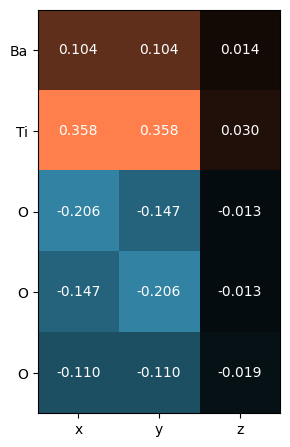

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (3,5.5), dpi = 100)

from matplotlib.colors import ListedColormap
vals = np.ones((256, 4))
vals[0:128, :3] = 1-np.linspace(0, 1, 128)[:,np.newaxis]
vals[128:, :3] = np.linspace(0, 1, 128)[:,np.newaxis]
vals = vals**0.8
vals[0:128, 0] *= .3
vals[0:128, 1] *= .8
vals[128:, 2] *= .3
vals[128:, 1] *= .5
newcmp = ListedColormap(vals)



#ax.set_title('Displacement [pm] \n $|E|$ = 1 kV/cm , $Ê$ = [111]')
c = ax.imshow(dr_av_dft, cmap = newcmp, vmin = -np.max(dr_av_dft), vmax = np.max(dr_av_dft))
#cax = fig.colorbar(c, ax = ax)
#cax.set_label('displacement, [pm]')
print(np.average(dr_av_dft, axis = 0))
for i in range(5):
    for j in range(3):
        ax.text(j,i,f'{dr_av_dft[i,j]*10**12:.3f}', ha = 'center', va = 'center', color = [1,1,1,1])
ax.set_yticks(np.arange(5))
ax.set_yticklabels(ion_names)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['x','y','z'])
fig.tight_layout()

# Calc empirical

In [5]:
eps_0 = 8.8541878128e-12
V_uc = structure[0,0]*structure[1,1]*structure[2,2]*1e-30
#print(V_uc)
reduced_born_charge_tensor = np.zeros((5,3))
for i in range(5):
    for j in range(3):
        reduced_born_charge_tensor[i,j] = born_charge_tensor[i,j,j]
vareps_dft = np.sum(electron_charge*reduced_born_charge_tensor*sigma_dft/(eps_0*V_uc), axis = 0)
print('vareps_dft', vareps_dft)

vareps_dft [13430.94717035 13430.96522058  1147.82486806]


In [6]:
sigma_emp = np.zeros((5,3))
ion_positions_o = ion_positions#-ion_positions[0,:]
offsets = ion_positions_o-np.array(ion_positions_o*2+0.5, dtype = int)/2
offsets = offsets[:,2]
charge = np.array([2,4,-2,-2,-2])*electron_charge
print(offsets)
o_shift = np.sum(offsets*np.abs(charge)/np.sum(np.abs(charge)))
offsets -= o_shift #np.average(offsets)
print(offsets)
weights = np.abs(offsets*charge**2)
weights /= np.sum(weights)
print(weights)

#weights = np.array([0,1,0,0,0])

vareps = np.array([3600,3600,150])
eps = vareps*eps_0

for i in range(5):
    sigma_emp[i,:] = weights[i]*eps*V_uc/(charge[i] )

dr_av_emp = sigma_emp*one_kVpcm_along_each_111[np.newaxis,:]


[ 0.00915698  0.02093464 -0.00315527 -0.00315527 -0.00924989]
[ 0.00324601  0.01502367 -0.00906624 -0.00906624 -0.01516086]
[0.03359073 0.62187903 0.09382038 0.09382038 0.15688948]


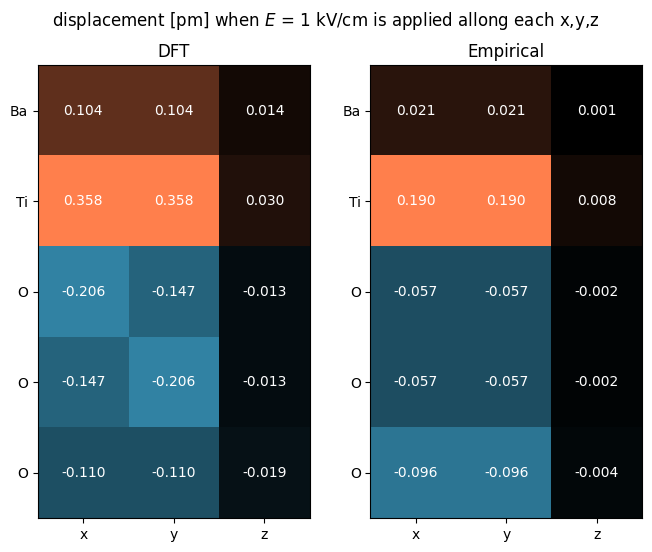

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (6.8,5.5), dpi = 100)

ax = axes[0]
ax.set_title('DFT')
dft_res = dr_av_dft*10**12
c = ax.imshow(dft_res, cmap = newcmp, vmin = -np.max(dft_res), vmax = np.max(dft_res))
for i in range(5):
    for j in range(3):
        ax.text(j,i,f'{dft_res[i,j]:.3f}', ha = 'center', va = 'center', color = [1,1,1,1])

        
ax = axes[1]
ax.set_title('Empirical')
emp_res = dr_av_emp*10**12
c = ax.imshow(emp_res, cmap = newcmp, vmin = -np.max(emp_res), vmax = np.max(emp_res))
for i in range(5):
    for j in range(3):
        ax.text(j,i,f'{emp_res[i,j]:.3f}', ha = 'center', va = 'center', color = [1,1,1,1])

for ax in axes:
    ax.set_yticks(np.arange(5))
    ax.set_yticklabels(ion_names)
    ax.set_xticks(np.arange(3))
    ax.set_xticklabels(['x','y','z'])
fig.suptitle('displacement [pm] when $E$ = 1 kV/cm is applied allong each x,y,z')
fig.tight_layout()

# Export res

In [8]:
import Dans_Diffraction
from structure_factor import structure_factor
Dans_Diffraction.classes_scattering.Scattering.x_ray_anomalous = structure_factor.x_ray_anomalous # assign x_ray_anomalous function to dan's diffraction

def get_xtl(structure, ion_names, ion_positions):
    xtl = Dans_Diffraction.Crystal()

    xtl.name = 'Crystal'
    xtl.new_cell([structure[0,0],structure[1,1],structure[2,2],90,90,90])
    #xtl.new_atoms(u=[0,0.5], v=[0,0.5], w=[0,0.25], type=['Na','O'], label=['Na1','O1'], occupancy=None, uiso=None, mxmymz=None)
    xtl.Atoms.changeatom(0, u=ion_positions[0,0], v=ion_positions[0,1], w=ion_positions[0,2], type=ion_names[0], label = ion_names[0],occupancy=None, uiso=None, mxmymz=None) # there is an Fe ion added by default
    for i in range(1, len(ion_positions)):
        i_label = ion_names[i] + str(np.sum([ion_names[k]==ion_names[i] for k in range(i) ] ))
        xtl.Atoms.addatom(u=ion_positions[i,0], v=ion_positions[i,1], w=ion_positions[i,2], type=ion_names[i], label = i_label, occupancy=None, uiso=None, mxmymz=None)
    #xtl.Symmetry.addsym('x,y,z+1/2')
    #xtl.Symmetry.load_spacegroup(99)
    xtl.generate_structure() # apply symmetry to atomic positions.
    #print(xtl.info())
    #xtl.Plot.plot_crystal()
    #plt.show()
    return xtl
f0_WaasKirf_dict = structure_factor.parse_f0_WaasKirf()
inonze_dict = {}
for i,ion in enumerate(set(ion_names)):
    #st.write('ion')
    pos_keys = [ion+'2-',ion+'1-',ion+'5+',ion+'4+',ion+'3+',ion+'2+',ion+'1+',ion]
    keys = []
    for key in pos_keys:
        if key in f0_WaasKirf_dict.keys():
            keys.append(key)
    inonze_dict[ion] = keys[0]
    
def ionize_fn(inp):
    if inp in inonze_dict.keys():
        return inonze_dict[inp]
    return inp
print(inonze_dict)


{'Ti': 'Ti4+', 'O': 'O2-', 'Ba': 'Ba2+'}


In [9]:


hkl = [0,1,1]
sigma = sigma_dft
energy_kev = 4.9664+0.014
wavelength_in_um = 4.135667696*10**-15 *299792458 / energy_kev /1000*10**6 #7.2932e-5 µm #7.2932e-11 m = 17 keV

xtl = get_xtl(structure, ion_names, ion_positions)
xtl = structure_factor.setup_dans_diffraction(xtl, wavelength_in_um, ionize_fn = ionize_fn, verbose = False)
a_scatter = xtl.Scatter.x_ray_anomalous(hkl, energy_kev = energy_kev, return_chi = True, per_atom = True)[0]

chi = np.sum(a_scatter)
'''
df_dE[i] = df_dR*dRdE[i]
dchi_dE[i] = sum(df_dE[i] for all atoms)
'''
Q = xtl.Cell.calculateQ(hkl)[0]

dchi_dE = np.zeros(3, dtype = complex)
for i, scatter in enumerate(a_scatter):
    df_dR = -1j*Q*scatter
    for j in range(3):
        dRdE = np.zeros(3)
        dRdE[j] = sigma[i,j]*10**10 # in AA
        dchi_dE[j] += np.dot(df_dR,dRdE)

hkl_p = -np.array(hkl)
a_scatter_p = xtl.Scatter.x_ray_anomalous(hkl_p, energy_kev = energy_kev, return_chi = True, per_atom = True)[0]

chip = np.sum(a_scatter_p)
'''
df_dE[i] = df_dR*dRdE[i]
dchi_dE[i] = sum(df_dE[i] for all atoms)
'''
Q = xtl.Cell.calculateQ(hkl_p)[0]

dchip_dE = np.zeros(3, dtype = complex)
for i, scatter in enumerate(a_scatter_p):
    df_dR = -1j*Q*scatter
    for j in range(3):
        dRdE = np.zeros(3)
        dRdE[j] = sigma[i,j]*10**10 # in AA
        dchip_dE[j] += np.dot(df_dR,dRdE)



import pickle
d = {}
d['chi'] = chi
d['dchi_dE'] = dchi_dE
d['chip'] = chip
d['dchip_dE'] = dchip_dE
d['hkl'] = hkl
d['energy_kev'] = energy_kev
d['Q'] = Q
del xtl.Scatter.x_ray_anomalous
del xtl.Scatter.ionize_fn
d['xtl'] = xtl
with open("chi_110_data.pickle","wb") as file:
    pickle.dump(d, file)

with open("chi_110_data.pickle","rb") as file:
    chi_data = pickle.load(file)
print(chi_data)

{'chi': (3.6649416024090714e-05+3.3842354607773137e-06j), 'dchi_dE': array([0.00000000e+00+0.00000000e+00j, 1.65765255e-13-1.25531970e-12j,
       1.55363880e-14-1.37155349e-13j]), 'chip': (3.532492766132202e-05+1.0252439649559478e-05j), 'dchip_dE': array([ 0.00000000e+00+0.00000000e+00j, -3.51190995e-13+1.19617834e-12j,
       -3.33951250e-14+1.31921270e-13j]), 'hkl': [0, 1, 1], 'energy_kev': 4.9804, 'Q': array([ 0.        , -1.5975237 , -1.58215262]), 'xtl': Crystal with 5 atomic positions, 1 symmetries}
